# DawR Notebook #13: Machine Learning is Just Statistics!

_Lesson Objectives_

1.  To learn basic machine learning methods

You have editing privileges to this document.  This is *NOT* a machine learning course.  We will only learn when to use each method, how to implement in R, and how to analyze the output.  


In [ ]:
# loading all the necessary libraries we've learned before
library(ggplot2)
library(dplyr)
# loading a new library for classification techniques
library(class)

## Clustering with K-Means

*   Clustering is the act of grouping data based on similarities in certain **quantitative** attributes.  For example, perhaps you tell Tinder that you only want to see people who are at least 6 feet tall.  Tinder will obviously recommend people greater than 6 feet tall, but it might also recommend people who are between 5'9" and 6'.
*   K-Means is a method (there are many others!) that creates $k$ groups based on distance between data points.  I will go over this method here.



In [ ]:
# load the iris data set
data(iris)
# check out its variables




Notice that the iris data set has four quantitative variables for each iris.  Perhaps we want to cluster irises together based on "sepal length" and "petal length".  Let's look at a graph to see if this makes sense to do.

In [ ]:
ggplot(data = iris, aes(x = Sepal.Length, y = Petal.Length)) + geom_point() + ggtitle("Irises Sepal Length v Petal Length")

<font color=#C7B8EA>Are there any clear groupings based on the graph?  If so, how many do you think there are?</font>  Use this textbox to answer.

K-means creates circles around groups.  

*   Initialize $k$ means, called $\bar{x}_i$ for i = 1 to k.
*   For all points, if they are less than $r$ away from a particular $\bar{x}_i$, then they are assigned to the $i$-th group.
*   The $k$ means are re-calculated based on the data points in their groups.
*   Start this process over again.  Do this $t$ times.

We, as the data analysts, select 

$k$ (the number of clusters to create), and 

$t$ (the number of times to repeat the process).


<font color=#C7B8EA>Explain the process above in your own words.  This will help you synthesize the information.  If it helps, use an example or try to explain to a classmate or draw a picture!</font>  Insert any of this work here.

In [ ]:
# we will specify these arguments ahead of time
k = 2; t = 10; # the semi-colon allows us to put more than one action on a single line

results = iris %>% select(Sepal.Length, Petal.Length) %>% kmeans(centers = k, iter.max = t)

The results will give us the cluster number for each data point.  Let's check this out to see what we have.

In [ ]:
iris_clustered = iris %>% mutate(cluster_id = results$cluster)

ggplot(data = iris_clustered, aes(x = Sepal.Length, y = Petal.Length)) + 
  geom_point(aes(color = as.factor(cluster_id))) + 
    scale_color_brewer("Clusters", palette = 'Set2') + 
      ggtitle("Irises Sepal Length v Petal Length")

<font color=#C7B8EA>Is this the output you expected?  Why or why not?</font>  Answer in this text box.

## Classification with K-Nearest Neighbors

*   Classification is the act of grouping data based on some **qualitative** attribute.  For example, once you've watched *Mean Girls* on Netflix, it might recommend *Freaky Friday* to you next because \<lindsay lohan\>, \<teen\>, \<movie\>, \<romcom\> are all attributes of *Mean Girls* shared with *Freaky Friday*.
*   K-Nearest Neighbors is a method that determines which group a data point belongs to based on the most common attributes of the $k$ nearest neighbors.  I will go over this method here.

We'll stick with the iris dataset!  We first split the data into two subsets, a smaller data set of irises that we'll try to classify correctly based on a larger subset of irises.



In [ ]:
# create a colum of row numbers
ID = iris %>% mutate(id_row = row_number())
# create a random subset from 80% of the existing data
train = ID %>% sample_frac(0.80)
# select everything else in ID
test = anti_join(ID, train, by = 'id_row')

K-Nearest Neighbors classifies new data.

*   Determines the $k$ nearest neighbors to a new data point.
*   Checks out how those neighbors are classified.
*   Gives the new data point the classification most common for those $k$ neighbors.

As the data analysts, we only specify 

$k$, the number of neighbors we should care about.



<font color=#C7B8EA>Explain the process above in your own words.  This will help you synthesize the information.  If it helps, use an example or try to explain to a classmate or draw a picture!</font>  Insert any of this work here.

In [ ]:
# need cl to be a factor AND to be the classification of the train set
cl = train$Species
# use the true classifications for comparison later
truth = test$Species
# need only quantitative data for function
train = train[,1:4]
test = test[,1:4]
# stick in training set, test set, the classification for training, and specify 
# the number of neighbors to look at
results_again = knn(train, test, cl, k = 13)

Let's see how accurate the predicted iris class for the data in *test* is by comparing it to the truth!

In [ ]:
table(results_again, truth)

<font color=#C7B8EA>What do you think the table is displaying?  Compare its results to an explicit examination of _results\_again_ and _truth_.</font>

Let's make a graph and annotate like we learned in Lesson 9!

In [ ]:
ggplot(data = train, aes(x = Sepal.Length, y = Petal.Length)) + 
  geom_point(aes(color = cl)) + 
    geom_point(data = test, aes(x = Sepal.Length, y = Petal.Length, color = results_again), shape = 13) + 
      annotate(geom = "point", x = test$Sepal.Length, y = test$Petal.Length, size = 10, shape = 21, fill = "transparent") + 
        scale_color_brewer("Clusters", palette = 'Set2') + 
          ggtitle("Irises Sepal Length v Petal Length")

<font color=#C7B8EA>Describe and analyze what you see.</font>

## Prediction with Linear Regression

We will revisit our old friend.  Linear Regression is very versatile and simple.  It is why everyone uses it everywhere.

Recall the problem from the last notebook:

> "The bigger they are, the harder they fall."  Below is the weight (kg) of 5 different objects and the force (kg*m/s<sup>2</sup>) with which they hit the ground (taking into consideration there is air resistance).

| weight | force |
| :-: | :-: | 
| 45.3 | 443.94 |
| 22.6 | 221.48 |
| 34.5 | 338.10 |
| 0.91 | 8.82 |
| 38.6 | 378.29 |


  

In [ ]:
# create a data frame
DF = data.frame(weight = c(45.3, 22.6,34.5,0.91,38.6), force = c(443.94,221.48,338.10,8.82,378.29))
# create scatterplot
ggplot(data = DF, aes(x = weight, y = force)) + geom_point()  

*Linear Regression* helped us to answer 

*    is there really a linear relationship between the explanatory and response variables in the population (all objects) or might the pattern we see in the scatterplot plausibly arise just by chance?

*   what is the rate of change that relates the response variable to the explanatory variable in the population (all objects), including the margin of error for our estimate of the slope?



Here, we will answer a different question

*   given a new data point $x = x^{*}$, what is the $y$-value predicted by the line?
*   what is the margin of error for this prediction?  That is, under a slightly different model, how much will the prediction change?


In [ ]:
# find the least squares information
lsq = lm(force ~ weight, data = DF) # the formula is response/dependent variable ~ explanatory/independent variable

Now that we have the model *lsq*, we can use it to predict the force with which an object weighing 55.1 kg hits the ground.

In [ ]:
yhat = predict(lsq, data.frame(weight = 55.1))

ggplot(data = DF, aes(x = weight, y = force)) + geom_point(color = "blue") +
  geom_point(aes(x = 55.1, y = yhat), color = "red")  

<font color=#C7B8EA>Does the result to seem to accurately fit the relationship between weight and force?  Why or why not?</font> Answer in this textbox.

In [ ]:
predict(lsq, data.frame(weight = 55.1), interval = "prediction")

The code chunk above produces an output: prediction_by_model, lower_bd, upper_bd.

*   prediction_by_model is just the result of plugging $x=55.1$ into $\hat{y} = m\cdot x + b$, where slope $m$ and intercept $b$ is found by the least squares method discussed in Lesson 10.  We also found this in `yhat = predict(lsq, data.frame(weight = 55.1))`.
*   lower_bd and upper_bd are part of an interval that says: 95% of objects that weight 55.1 will result in a force between 529.9215 and 540.1261.



## **Fill this out please** 🙏

I'm looking for feedback!  Data analysis is interdisciplinary and often professional teams are made of a diverse set of expertise.  The goal for this course is for it to be accessible to students of any mathematical and programming backgrounds as long as the student has a desire to learn data science skills.

I would really appreciate if you could let me know what worked and what didn't!  Here's a [google form](https://forms.gle/AMB1E7Tq6kw9MEww6) for the learning/lessons part of the course.  I will send this around again at the end of the semester so you can fill it out completely later.

## **The End**

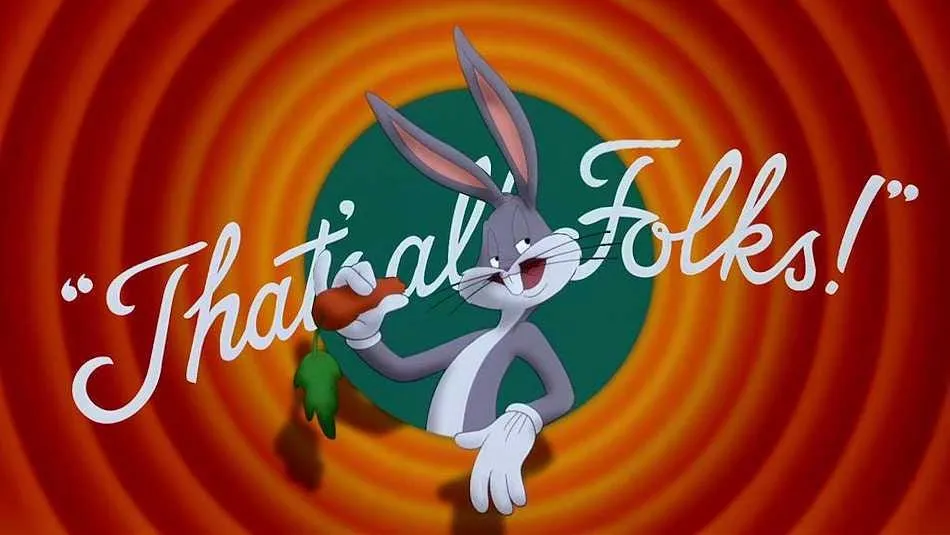